# Crypto Analysis

Eric Hedgren, Gavin Fisher, and Blake Nelson

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def get_crypto_data(ticker="BTC-USD", period="max"):
    crypto = yf.Ticker(ticker)
    data = crypto.history(period=period)
    data.reset_index(inplace=True)
    data = data.rename(columns={"Close": "price", "Date": "timestamp"})
    return data

def prepare_data(df):
    # df = df.rename(columns={"Close": "price", "Date": "timestamp"})
    df['price_next'] = df['price'].shift(-1)
    df = df.dropna()

    # Use the first 90% for training and the last 10% for testing
    train_size = int(len(df) * 0.9)
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]

    X_train = train_df[['price']]
    y_train = train_df['price_next']
    X_test = test_df[['price']]
    y_test = test_df['price_next']
    
    return X_train, y_train, X_test, y_test, test_df

def train_model(X_train, y_train, X_test, y_test):
    """Train a linear regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return model, rmse, y_pred, y_test

def predict_tomorrow(model, df):
    last_price = df['price'].iloc[-1]
    predicted_price = model.predict([[last_price]])[0]
    return predicted_price

def plot_data(df):
    """Plot cryptocurrency price data."""
    plt.plot(df['timestamp'], df['price'], label='Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Cryptocurrency Price Over Time')
    plt.legend()
    plt.show()


RMSE of the model: 1789.5047354904373
Predicted price for tomorrow: 100758.78049670094


/home/eric/git-repos/CryptoAnalysis-DS3010/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


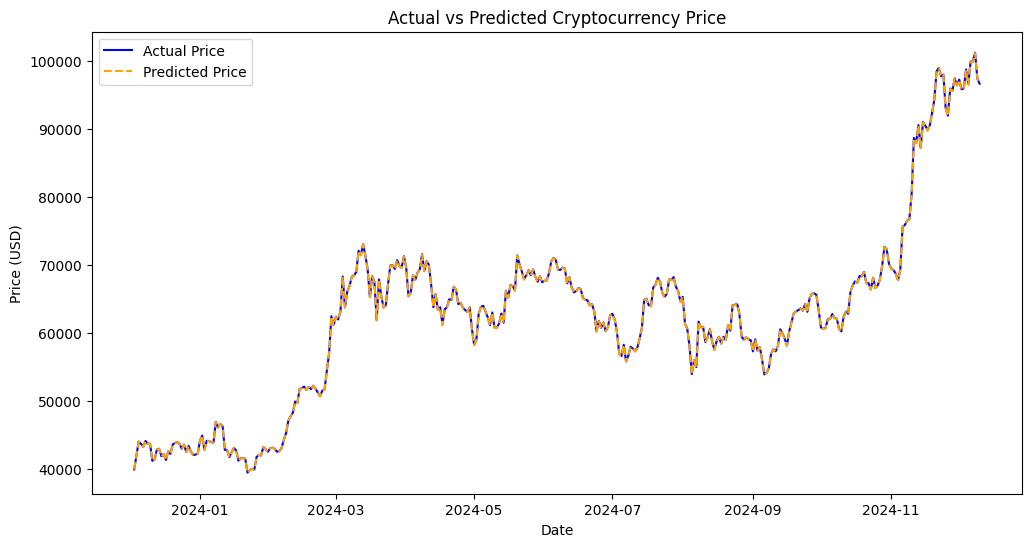

In [19]:
# Main script to demonstrate usage
data = get_crypto_data()
X_train, y_train, X_test, y_test, test_df = prepare_data(data)
model, rmse, y_pred, y_test = train_model(X_train, y_train, X_test, y_test)
predicted_price = predict_tomorrow(model, data)

print(f"RMSE of the model: {rmse}")
print(f"Predicted price for tomorrow: {predicted_price}")

# Plot the data and predictions
test_df['Predicted'] = y_pred
plt.figure(figsize=(12, 6))
plt.plot(test_df['timestamp'], test_df['price'], label='Actual Price', color='blue')
plt.plot(test_df['timestamp'], test_df['Predicted'], label='Predicted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Actual vs Predicted Cryptocurrency Price')
plt.legend()
plt.show()